In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns

In [2]:
train=pd.read_csv("Hackearth/9555b456-8-dataset/dataset/yds_train2018.csv")
train.head()

,S_No,Year,Month,Week,Merchant_ID,Product_ID,Country,Sales
0,1,2013,1,1,ar00001,1,Argentina,157500.0
1,2,2013,1,1,ar00003,1,Argentina,39375.0
2,3,2013,1,1,ar00004,1,Argentina,15750.0
3,4,2013,1,1,ar00007,1,Argentina,47250.0
4,5,2013,1,1,ar00008,1,Argentina,283500.0


In [3]:
test=pd.read_csv("Hackearth/9555b456-8-dataset/dataset/yds_test2018.csv")
test.head()

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,NaN
1,79074,2016,5,1,Argentina,NaN
2,79075,2016,6,1,Argentina,NaN
3,79076,2016,7,1,Argentina,NaN
4,79077,2016,8,1,Argentina,NaN


In [4]:
holiday=pd.read_excel("Hackearth/9555b456-8-dataset/dataset/holidays.xlsx")
holiday.head()

,Date,Country,Holiday
0,"2014, 1, 1",Denmark,Nytårsdag
1,"2014, 4, 17",Denmark,Skærtorsdag
2,"2014, 4, 18",Denmark,Langfredag
3,"2014, 4, 20",Denmark,Påskedag
4,"2014, 4, 21",Denmark,Anden påskedag


In [5]:
expense=pd.read_csv("Hackearth/9555b456-8-dataset/dataset/promotional_expense.csv")
expense.rename(columns={"Product_Type":"Product_ID"},inplace=True)
expense.head()

,Year,Month,Country,Product_ID,Expense_Price
0,2013,1,Argentina,1,14749.307
1,2013,1,Argentina,2,1329.374
2,2013,1,Belgium,2,249.590
3,2013,1,Columbia,1,1893.122
4,2013,1,Columbia,2,1436.726


In [324]:
missing=expense.isnull().sum(axis=0)/train.shape[0]
data_types=train.dtypes

In [6]:
train.drop(["Merchant_ID",'Week'],axis=1,inplace=True)

In [7]:
train=train.groupby(['Year', 'Month', 'Product_ID', 'Country'],as_index=False).sum()

In [8]:
train_test=pd.concat([train,test])

In [9]:
holiday['count']=[1]*holiday.shape[0]
holiday["Month"]=holiday["Date"].apply(lambda x:x.split(",")[1]).astype('int')
holiday["Year"]=holiday["Date"].apply(lambda x:x.split(",")[0]).astype("int")
holiday.drop(["Date","Holiday"],axis=1,inplace=True)
hol_agg=holiday.groupby(['Country','Month', 'Year'],as_index=False).sum()

In [10]:
hol_agg.columns

Index(['Country', 'Month', 'Year', 'count'], dtype='object')

In [11]:
train_test=train_test.merge(hol_agg,how="left",on=['Country', 'Month', 'Year'])
train_test["count"]=train_test["count"].fillna(0)

In [12]:
train_test.columns

Index(['Country', 'Month', 'Product_ID', 'S_No', 'Sales', 'Year', 'count'], dtype='object')

In [13]:
train_test=train_test.merge(expense,how="left",on=['Year', 'Month', 'Country', 'Product_ID'])

In [14]:
le=LabelEncoder()
train_test["Country"]=le.fit_transform(train_test["Country"])

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [16]:
tr_id=train_test["Expense_Price"].notnull()
knn_data_train=train_test.loc[tr_id].copy()
knn_data_test=train_test.loc[~tr_id].copy()
y_tr_knn=knn_data_train["Expense_Price"]
knn_data_train.drop(["Expense_Price","S_No","Sales"],axis=1,inplace=True)
knn_data_test.drop(["Expense_Price","S_No","Sales"],axis=1,inplace=True)


In [17]:
neigh=KNeighborsRegressor(n_neighbors=3,weights="distance")
neigh.fit(knn_data_train,y_tr_knn)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='distance')

In [18]:
pred=neigh.predict(knn_data_test)
knn_data_test["exp"]=pred
knn_data_train["exp"]=y_tr_knn


In [19]:
train_test["Expense_Price"]=knn_data_train.append(knn_data_test)["exp"]

In [20]:
train_test

,Country,Month,Product_ID,S_No,Sales,Year,count,Expense_Price
0,0,1,1,15931,3.434602e+07,2013,1.0,14749.307
1,2,1,1,6536745,3.947356e+06,2013,2.0,1893.122
2,0,1,2,364805,2.751851e+06,2013,1.0,1329.374
3,1,1,2,280368,3.148501e+05,2013,1.0,249.590
4,2,1,2,11298201,2.885137e+06,2013,2.0,1436.726
5,3,1,2,15814500,1.018476e+08,2013,1.0,43843.906
6,4,1,4,3437725,1.669076e+05,2013,1.0,183.482
7,5,1,4,19351332,1.515342e+07,2013,2.0,750.618
8,4,1,5,7935429,4.623706e+05,2013,1.0,330.367
9,0,2,1,43754,3.200558e+07,2013,2.0,12187.566


In [20]:
def smape(actual,forecast):
    res=0
    for i in range(len(actual)):
        res+=abs(forecast[i]-actual[i])/((abs(actual[i])+abs(forecast[i]))/2)
    s=(res*100/len(actual))
    s=(2 - (s/100))
    return s


In [21]:
X_Data=train_test[train_test["Sales"].notnull()]
X_test=train_test[train_test["Sales"].isnull()]


In [22]:
Y_Data=X_Data["Sales"]
X_Data.drop(["S_No","Sales"],inplace=True,axis=1)
X_test.drop(["S_No","Sales"],inplace=True,axis=1)
X_train, X_val, y_train, y_val=train_test_split(X_Data,Y_Data,test_size=0.2)


/home/saksham/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/saksham/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
X_train.reset_index(inplace=True,drop=True)
X_val.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_val.reset_index(drop=True,inplace=True)

In [24]:
def nearest_neighbour(X_train,y_train,X_val,y_val,n=5,weight="uniform"):
    neigh=KNeighborsRegressor(n_neighbors=n,weights=weight)
    neigh.fit(X_train,y_train)
    pred=neigh.predict(X_val)
    #print(pred)
    s=smape(y_val,pred)
    print("score is {}".format(s))
    return neigh
    

In [25]:
classifier_knn=nearest_neighbour(X_train,y_train,X_val,y_val,n=7,weight="distance")

score is 1.5646921936085971


In [26]:
pred=classifier_knn.predict(X_test)

In [27]:
test["Sales"]=pred

In [494]:
test.to_csv("Hackearth/9555b456-8-dataset/dataset/solution.csv",index=False)

In [27]:
from sklearn.model_selection import KFold

In [28]:
def Kfold_split(clf,X,y,X_test,n=3):
    kf=KFold(n_splits=n)
    accuarcy=[]
    prediction=np.zeros(len(X_test))
    for tr_indices,tt_indices in kf.split(X):
        X_train,X_val=X.loc[tr_indices],X.loc[tt_indices]
        y_train,y_val=y.loc[tr_indices],y.loc[tt_indices]
        y_train.reset_index(drop=True,inplace=True)
        y_val.reset_index(drop=True,inplace=True)
        clf.fit(X_train,y_train)
        pred=clf.predict(X_val)
        prediction+=clf.predict(X_test)
        
        #print(a)
        s=smape(y_val,pred)
        accuarcy.append(s)
    print(accuarcy)
    acc=sum(accuarcy)/len(accuarcy)
    print("Accuarcy is {}".format(acc))
    prediction=prediction/n
    return (prediction,acc)
    
    

In [29]:
clf_knn=KNeighborsRegressor(n_neighbors=3,weights="distance")
a=Kfold_split(clf_knn,X_Data,Y_Data,X_test,n=5)

[1.6566923465180725, 1.7822095327418719, 1.5944993868057429, 1.557406174471045, 1.2256610820862486]
Accuarcy is 1.5632937045245963


In [549]:
test["Sales"]=a[0]

In [550]:
test.to_csv("Hackearth/9555b456-8-dataset/dataset/solution_knn_ens.csv",index=False)

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
### scaling the Expense Variable
X_scaled=X_Data.copy()
std=StandardScaler()
a=np.asarray(list(X_Data["Expense_Price"])+list(X_test["Expense_Price"]))
a=a.reshape(-1,1)
b=std.fit_transform(a)
X_test_scaled=X_test[:]
X_test_scaled["Expense_Price"]=b[X_scaled.shape[0]:]

In [32]:
X_scaled["Expense_Price"]=b[:X_scaled.shape[0]]

In [33]:
clf_knn=KNeighborsRegressor(n_neighbors=3,weights="distance")
pred_knn,_=Kfold_split(clf_knn,X_Data,Y_Data,X_test,n=5)

[1.6566923465180725, 1.7822095327418719, 1.5944993868057429, 1.557406174471045, 1.2256610820862486]
Accuarcy is 1.5632937045245963


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [36]:
svr = SVR(kernel='linear')
lm = LinearRegression()

In [37]:
## Linear Regression
lm = LinearRegression(normalize=True)
a=Kfold_split(lm,X_Data,Y_Data,X_test,n=5)

[1.1396072082658963, 1.2261480739279882, 1.1944926639990534, 1.1150632983051538, 0.965896536017703]
Accuarcy is 1.128241556103159


In [38]:
###SVR 
svr =SVR(C=0.3, epsilon=0.7,kernel="linear")
pred_svr,_=Kfold_split(svr,X_Data,Y_Data,X_test,n=5)


[1.6874176603506368, 1.6563546991034594, 1.5434817331290138, 1.5263871271268714, 1.363763589919814]
Accuarcy is 1.555480961925959


In [39]:
## Light gbm
import lightgbm as lgb

In [44]:
clf=lgb.LGBMRegressor(learning_rate=.05,num_leaves=100,n_estimators=70,max_depth=7,subsample_for_bin=175)
a=Kfold_split(clf,X_scaled,Y_Data,X_test,n=5)

[1.4647117086007644, 1.749103708758645, 1.6003581845795263, 1.3962597872308997, 1.1079514026018678]
Accuarcy is 1.4636769583543408


In [45]:
clf=lgb.LGBMRegressor(learning_rate=.05,num_leaves=150,n_estimators=80,max_depth=17,subsample_for_bin=175)
pred_l,_=Kfold_split(clf,X_Data,Y_Data,X_test,n=5)

[1.5521222563474821, 1.7441364693550474, 1.585321291656618, 1.3452087087074873, 1.1421005933609092]
Accuarcy is 1.4737778638855088


In [40]:
X_Data.columns

Index(['Country', 'Month', 'Product_ID', 'Year', 'count', 'Expense_Price'], dtype='object')

In [48]:
def best_features(X_train,y_train,X_test,clf):
    lt=list(X_train.columns)
    for ft in lt:
        X_revised_tr=X_train.drop(ft,axis=1)
        X_rev_tt=X_test.drop(ft,axis=1)
        _,acc=Kfold_split(clf,X_revised_tr,y_train,X_rev_tt,n=5)
        print("acc {} without ft {}".format(acc,ft))
    

In [49]:
clf_knn=KNeighborsRegressor(n_neighbors=7,weights="distance")
best_features(X_Data,Y_Data,X_test,clf_knn)

[1.6089574786320848, 1.7790687368980287, 1.5947929251682402, 1.5655463397162963, 1.2307421395778018]
Accuarcy is 1.5558215239984903
acc 1.5558215239984903 without ft Country
[1.617198048829196, 1.7756724608977081, 1.5863372132979578, 1.5692912294208619, 1.2346586043055967]
Accuarcy is 1.556631511350264
acc 1.556631511350264 without ft Month
[1.6096134980498293, 1.7797813142037215, 1.5951289918503553, 1.567268663299742, 1.2310684548380297]
Accuarcy is 1.5565721844483356
acc 1.5565721844483356 without ft Product_ID
[1.6114826894594043, 1.7798911142060316, 1.5966482924694747, 1.567534069842402, 1.2330492352400155]
Accuarcy is 1.5577210802434656
acc 1.5577210802434656 without ft Year
[1.6112778840338213, 1.7792742036081304, 1.5969270866290595, 1.5677374352656406, 1.2335245359106892]
Accuarcy is 1.5577482290894682
acc 1.5577482290894682 without ft count
[0.9091488565989689, 1.1417481731491599, 1.1646454788738478, 1.0446974604032953, 1.0151066071096575]
Accuarcy is 1.0550693152269859
acc 1.0

In [67]:
X_Data["Expense_Price"].head()

0    14749.307
1     1893.122
2     1329.374
3      249.590
4     1436.726
Name: Expense_Price, dtype: float64

In [74]:
X_new_ft=X_Data.copy()
X_new_ft["new"]=X_Data["Expense_Price"]*X_Data["count"]
X_tt=X_test.copy()
X_tt["new"]=X_test["Expense_Price"]*X_test["count"]


In [75]:
clf_knn=KNeighborsRegressor(n_neighbors=3,weights="distance")
a=Kfold_split(clf_knn,X_new_ft,Y_Data,X_tt,n=5)

[1.598710182999776, 1.7343888155598048, 1.552517792103835, 1.4982384242704914, 1.2558793668164063]
Accuarcy is 1.527946916350063


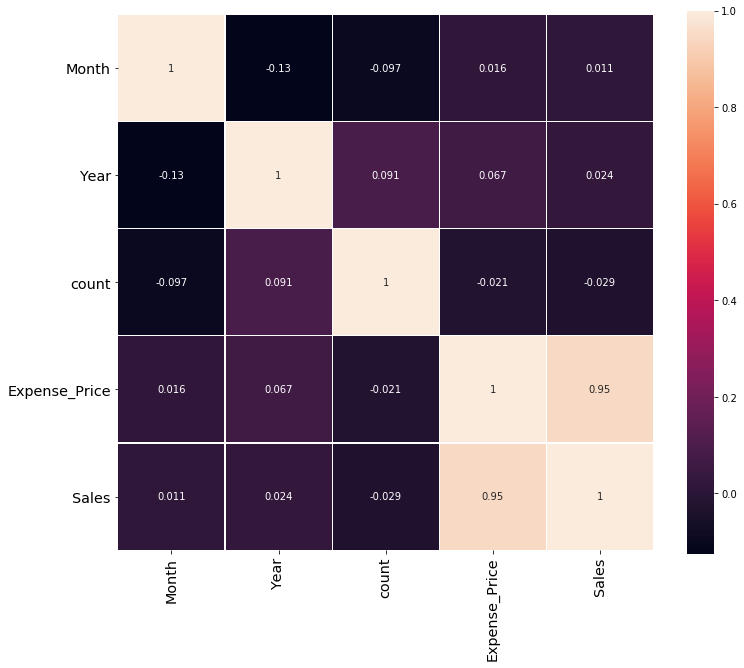

In [57]:
cont_feat=["Month","Year","count","Expense_Price"]
cor_df=pd.concat([X_Data[cont_feat],Y_Data],axis=1)
import seaborn as sns
corr=cor_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,square=True,linewidths=.15)
plt.xticks(label=cont_feat,size='x-large',rotation='vertical')
plt.yticks(y=cont_feat,size='x-large',rotation='horizontal')
plt.show()

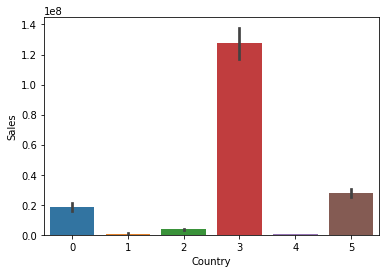

In [78]:
sns.barplot(x=X_Data["Country"],y=Y_Data)

In [77]:
X_Data.columns

Index(['Country', 'Month', 'Product_ID', 'Year', 'count', 'Expense_Price'], dtype='object')

In [84]:
p=np.zeros(X_Data.shape[0])
index_tr=X_Data["Country"]==3
p_tt=np.zeros(X_test.shape[0])
index_tt=X_test["Country"]==3
p[index_tr]=1
p_tt[index_tt]=1


In [85]:
X_new_ft=X_Data.copy()
X_new_ft["new"]=p
X_tt=X_test.copy()
X_tt["new"]=p_tt



In [86]:
clf_knn=KNeighborsRegressor(n_neighbors=3,weights="distance")
a=Kfold_split(clf_knn,X_new_ft,Y_Data,X_tt,n=5)

[1.6566923465180725, 1.7822095327867638, 1.5944993868057429, 1.557406174471045, 1.225661082088167]
Accuarcy is 1.5632937045339583
